# Notebook to evaluate *ritme* trials tracked with MLflow

This notebook shows how the output from the method `find_best_model_config` of the *ritme* package can be evaluated when the experiments are tracked with MLflow.

The only user inputs required are the path to the MLflow logs (variable `log_folder_location`) and the name of the experiment (variable `experiment_name`). For reproducibility the exact experiment is rerun (section [Run experiment](#run-experiment)) if it does not exist yet (depending on your compute power this might take a while to run).


## Setup

In [1]:
import warnings

import mlflow

from ritme.evaluate_mlflow import (
    barplot_metric,
    parallel_coordinates_plot,
    plot_complexity_vs_metric,
    violinplot_metric,
    plot_metric_history_per_model_type,
    plot_avg_history_per_model_type,
    extract_run_config,
)

warnings.filterwarnings("ignore", category=FutureWarning)

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
######## USER INPUTS ########

# path to MLflow logs
log_folder_location = "trials_mlflow/mlruns"
# name of the experiment
experiment_name = "trials_mlflow"

######## END USER INPUTS #####

## Run experiment

In [3]:
! ./run_experiment_mlflow.sh

find: trials_mlflow: No such file or directory
You can view the model logs by launching MLflow UI from within folder : trials_mlflow.
Ray Tune training of: linreg...
Using these resources: CPU 1
Using these resources: GPU 0
2025-06-08 19:00:20,632	INFO worker.py:1821 -- Started a local Ray instance.
Ray cluster resources: {'CPU': 8.0, 'memory': 5216822887.0, 'node:127.0.0.1': 1.0, 'object_store_memory': 2147483648.0, 'node:__internal_head__': 1.0}
Dashboard URL at: 
2025-06-08 19:00:22,406	WARNING optuna_search.py:350 -- You passed an initialized sampler to `OptunaSearch`. The `seed` parameter has to be passed to the sampler directly and will be ignored.
[I 2025-06-08 19:00:22,407] A new study created in memory with name: optuna
╭──────────────────────────────────────────────────────────╮
│ Configuration for experiment     linreg                  │
├──────────────────────────────────────────────────────────┤
│ Search algorithm                 SearchGenerator         │
│ Scheduler      

## Insights on performance per model type

In [4]:
# extract all trial information
mlflow.set_tracking_uri(log_folder_location)

all_trials = mlflow.search_runs(
    order_by=["metrics.rmse_val ASC"], search_all_experiments=True
)

print(f"Found {all_trials.shape[0]} trials")

Found 12 trials


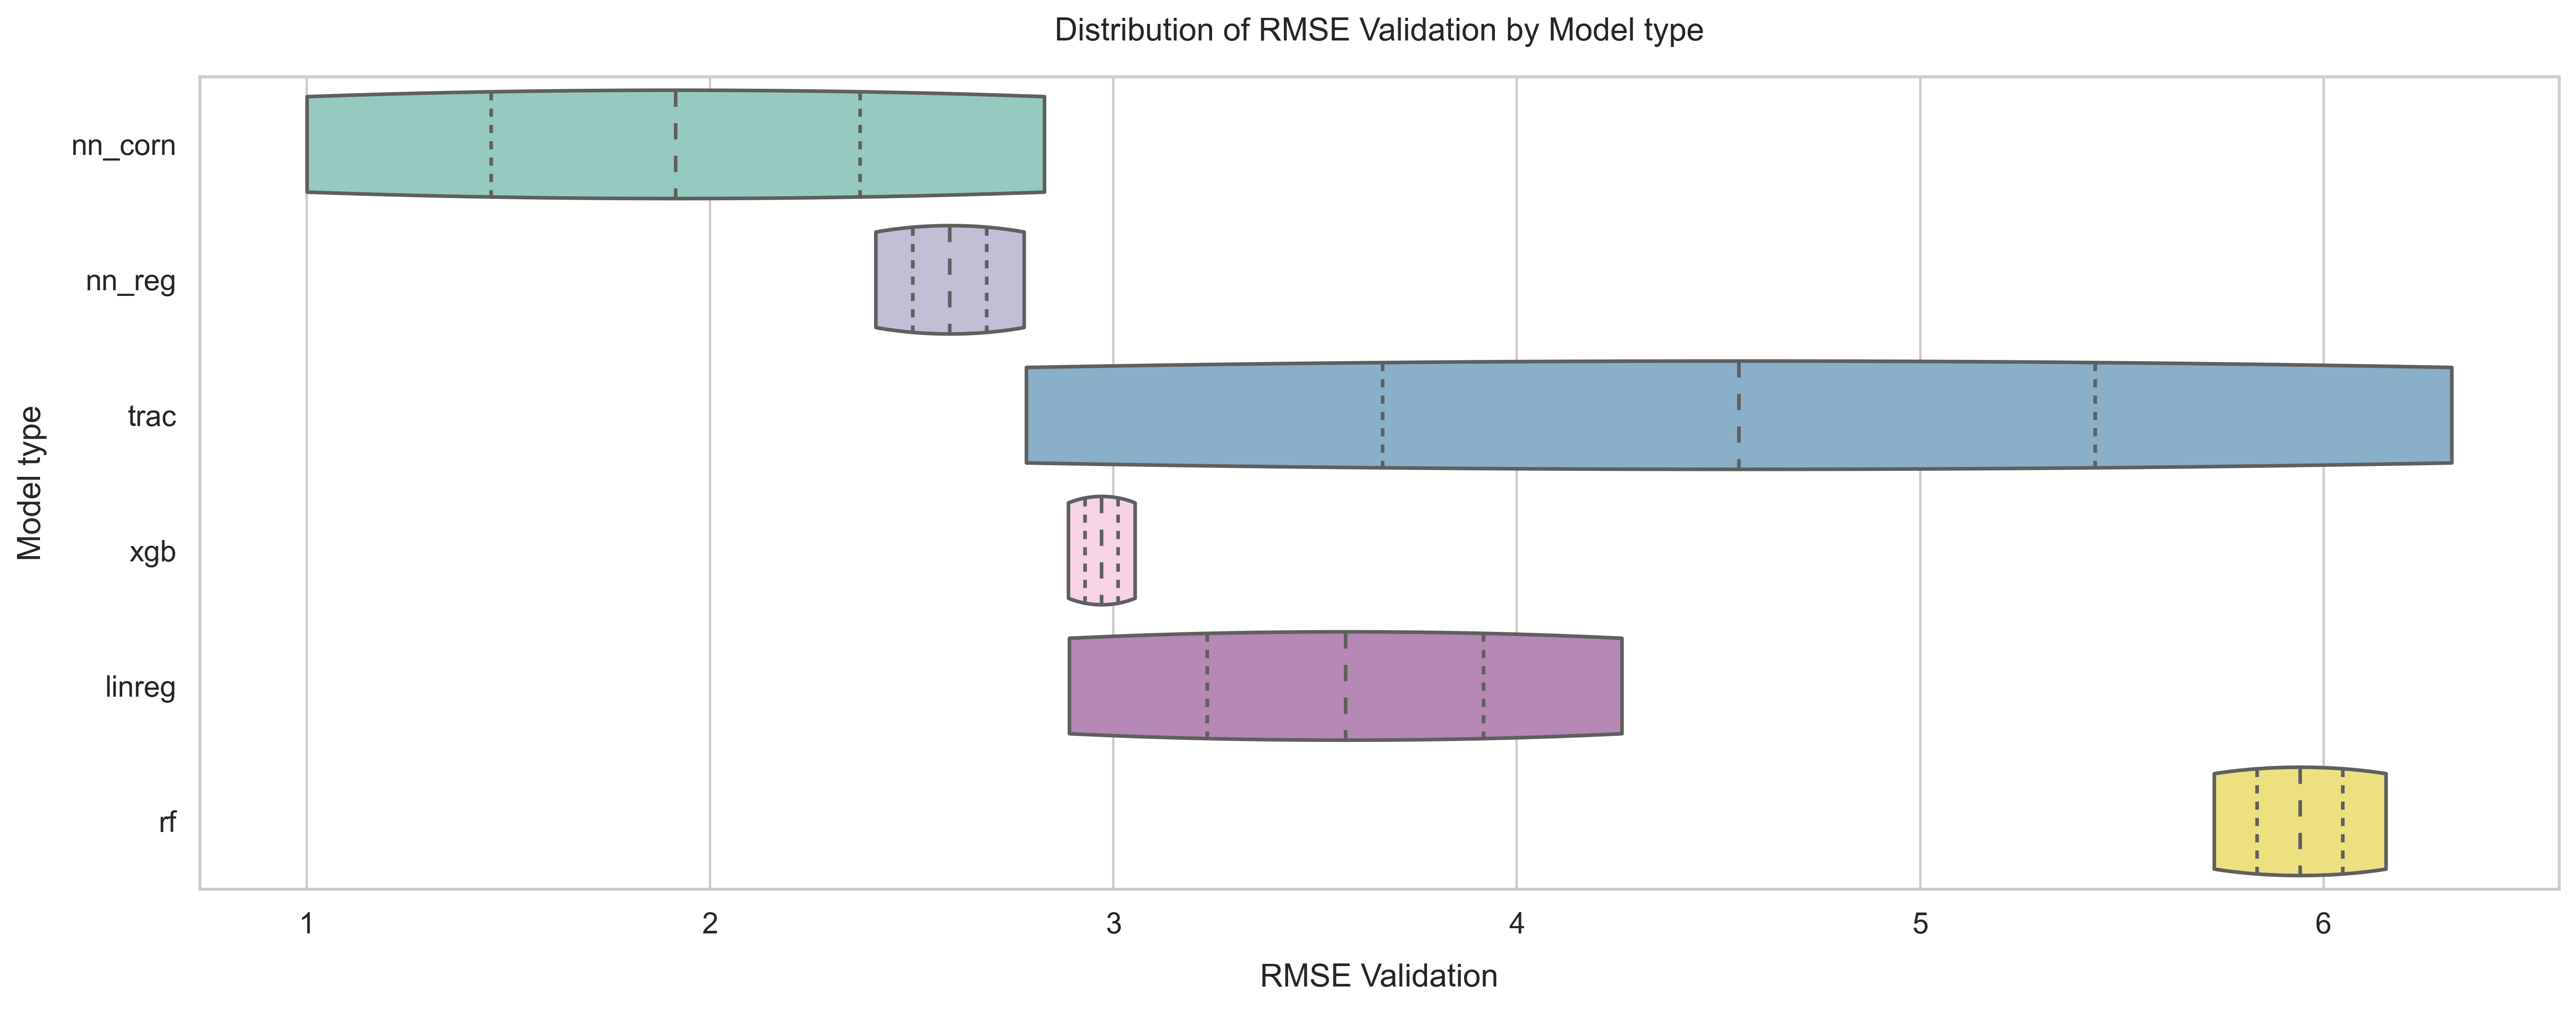

In [5]:
violinplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col="params.model",
    group_name="Model type",
)

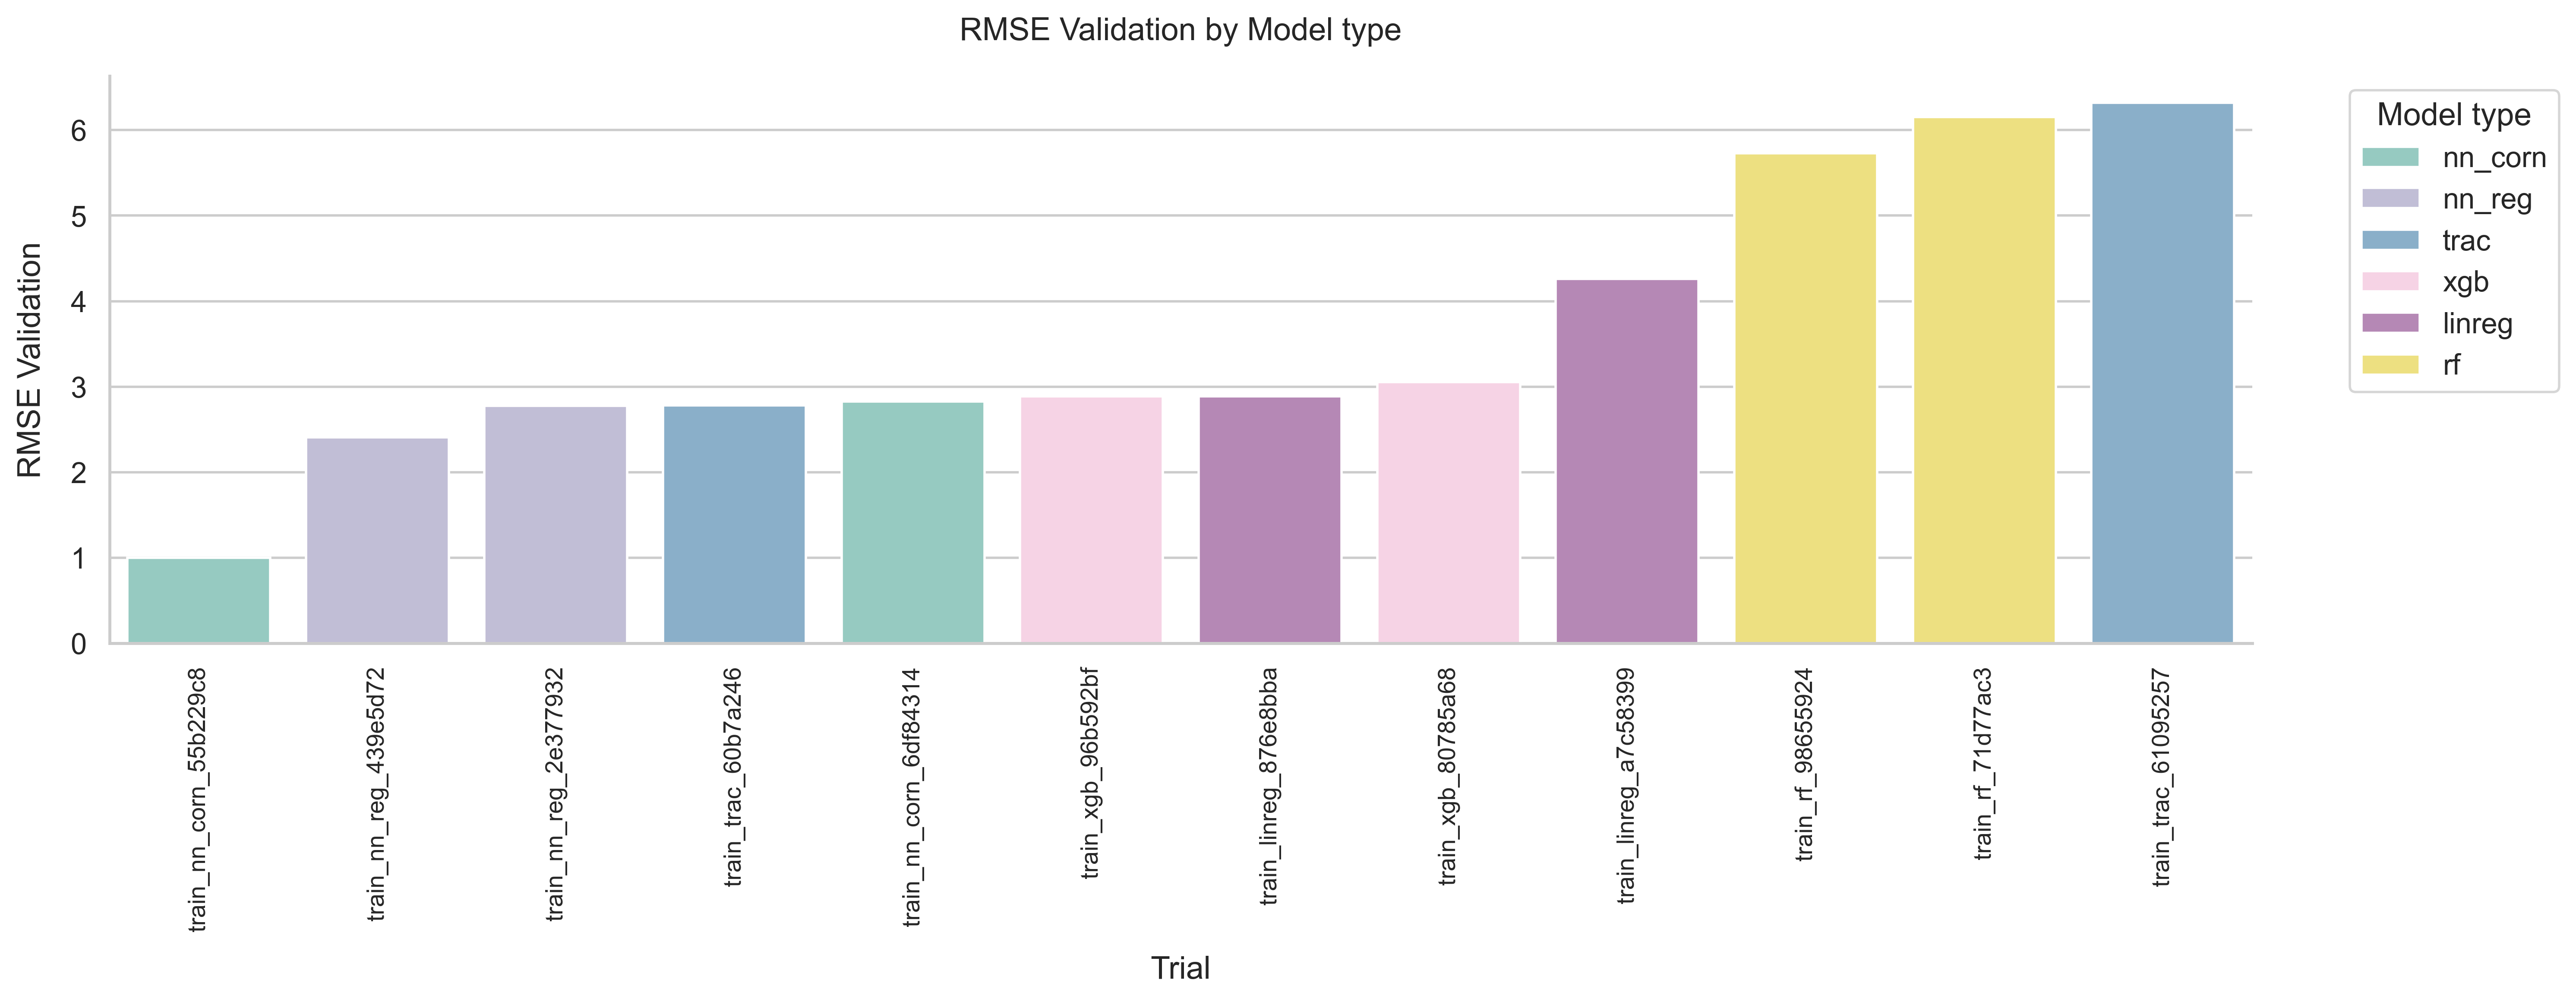

In [6]:
barplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col="params.model",
    group_name="Model type",
    display_trial_name=True,  # if true display trial name on the x-axis
    top_n=None,  # to plot top N models, set to an integer value
)

## Model complexity vs. performance

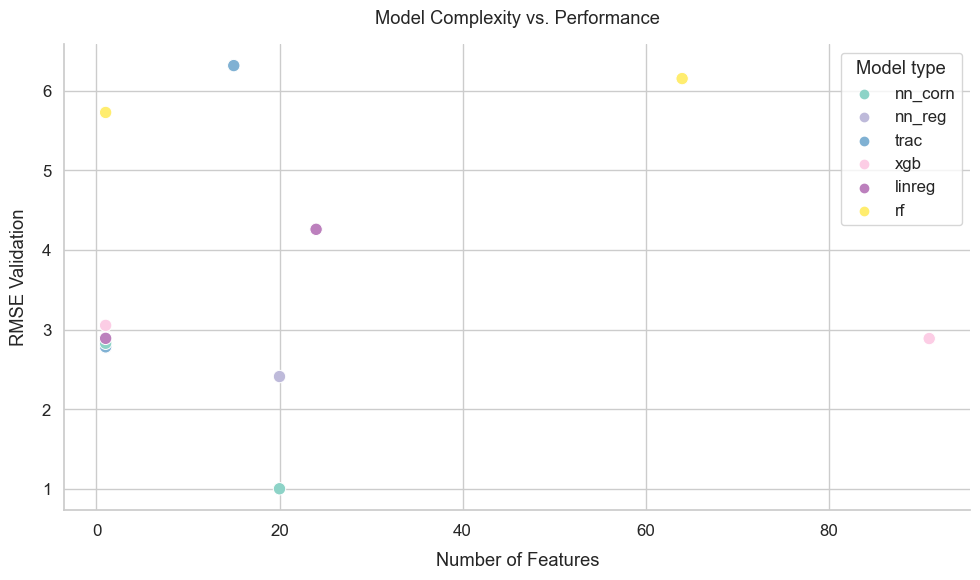

In [7]:
plot_complexity_vs_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col="params.model",
    group_name="Model type",
    static=True,  # Set to False for interactive plotly graph
)

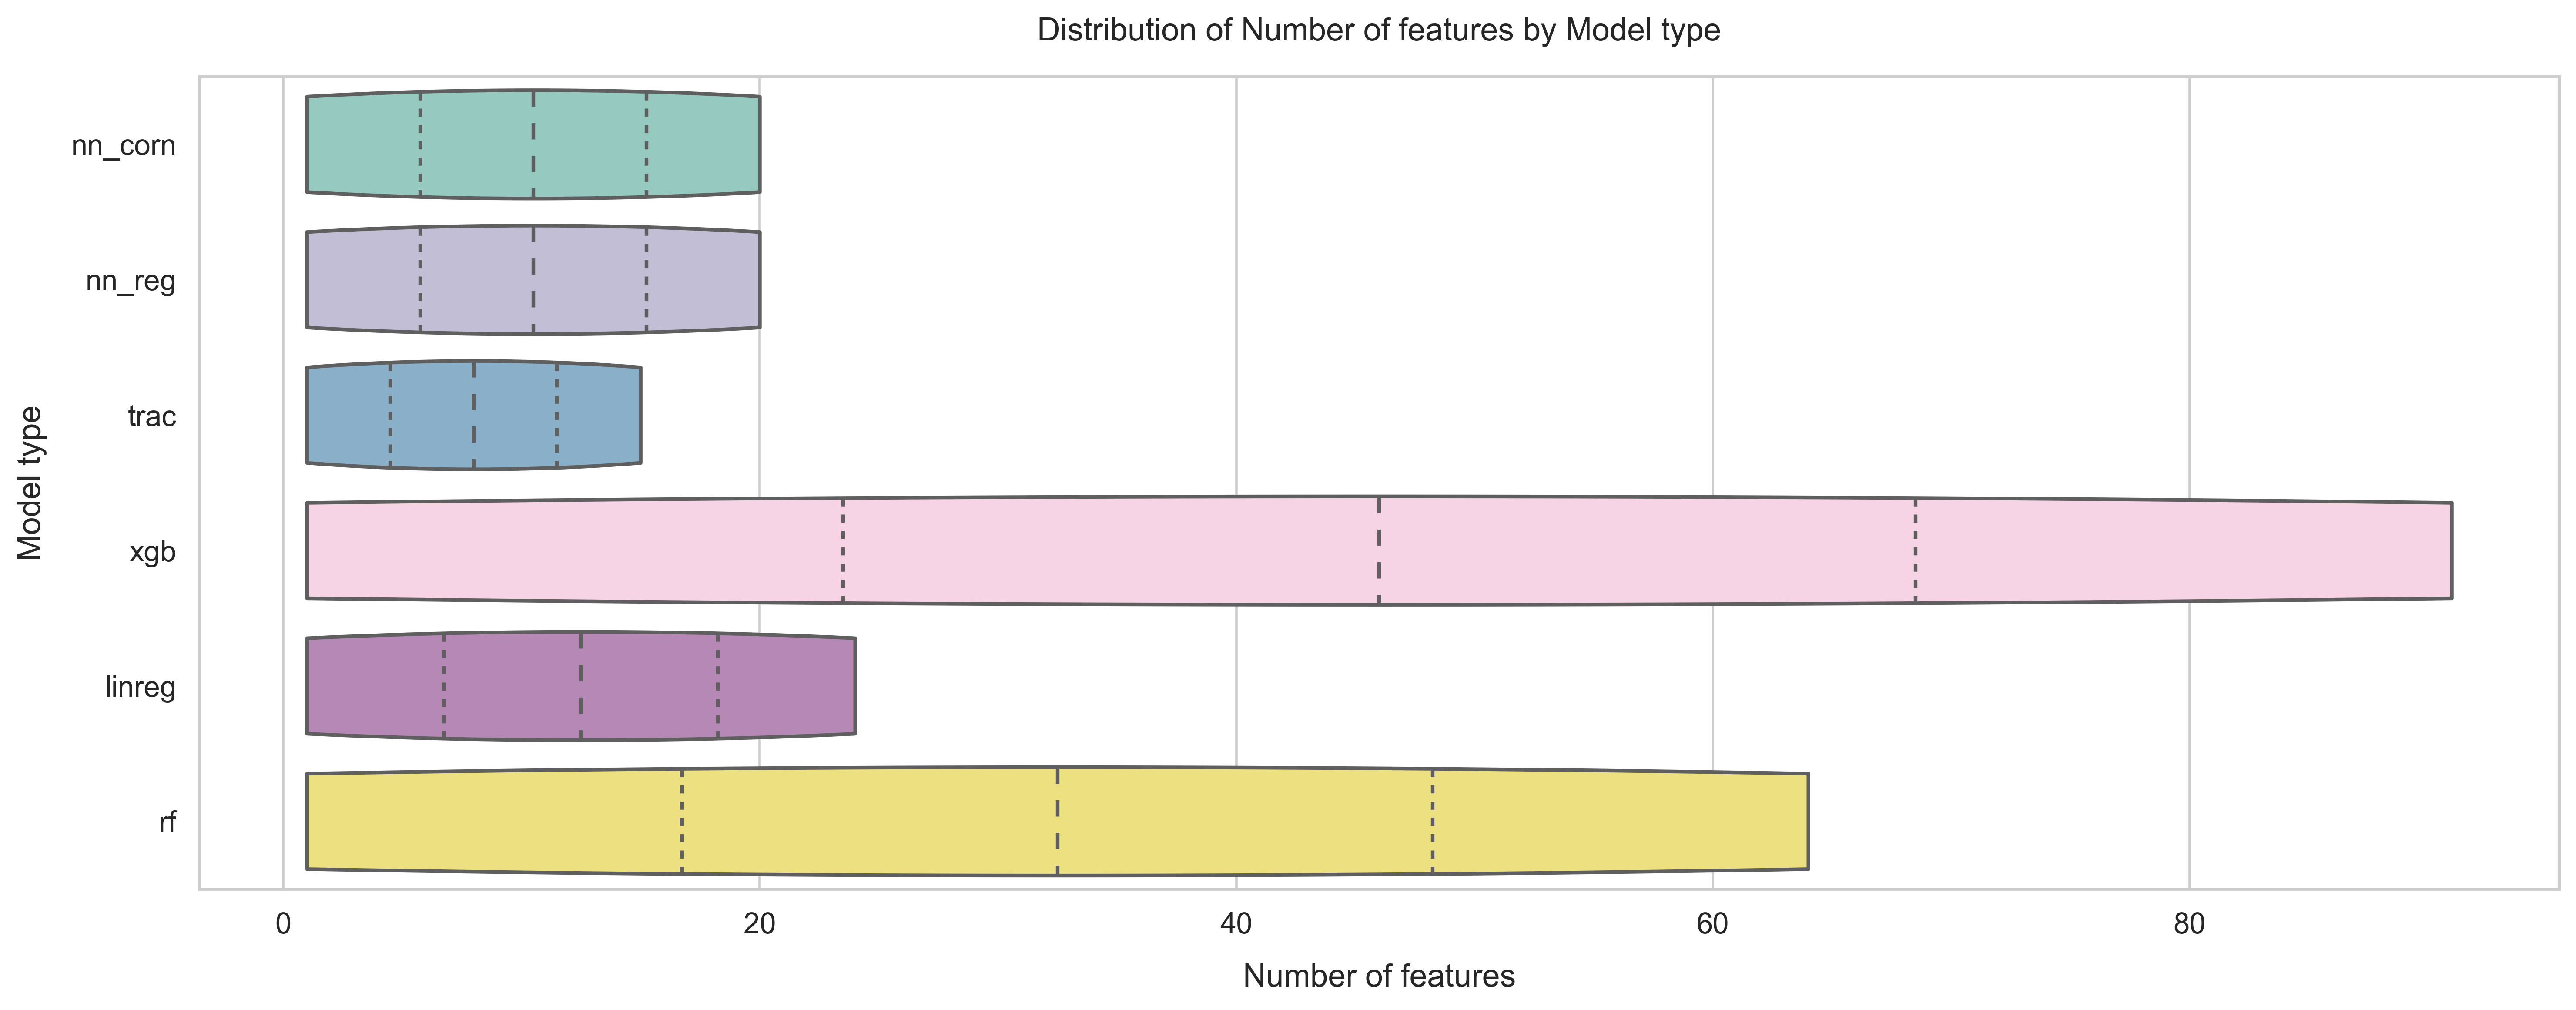

In [8]:
violinplot_metric(
    all_trials,
    metric_col="metrics.nb_features",
    metric_name="Number of features",
    group_col="params.model",
    group_name="Model type",
)

In [9]:
first_metric_col = "metrics.nb_features"
first_metric_name = "# features"
parallel_coordinates_plot(all_trials, first_metric_col, first_metric_name)

## Performance vs. feature engineering

### Effect of data transformation

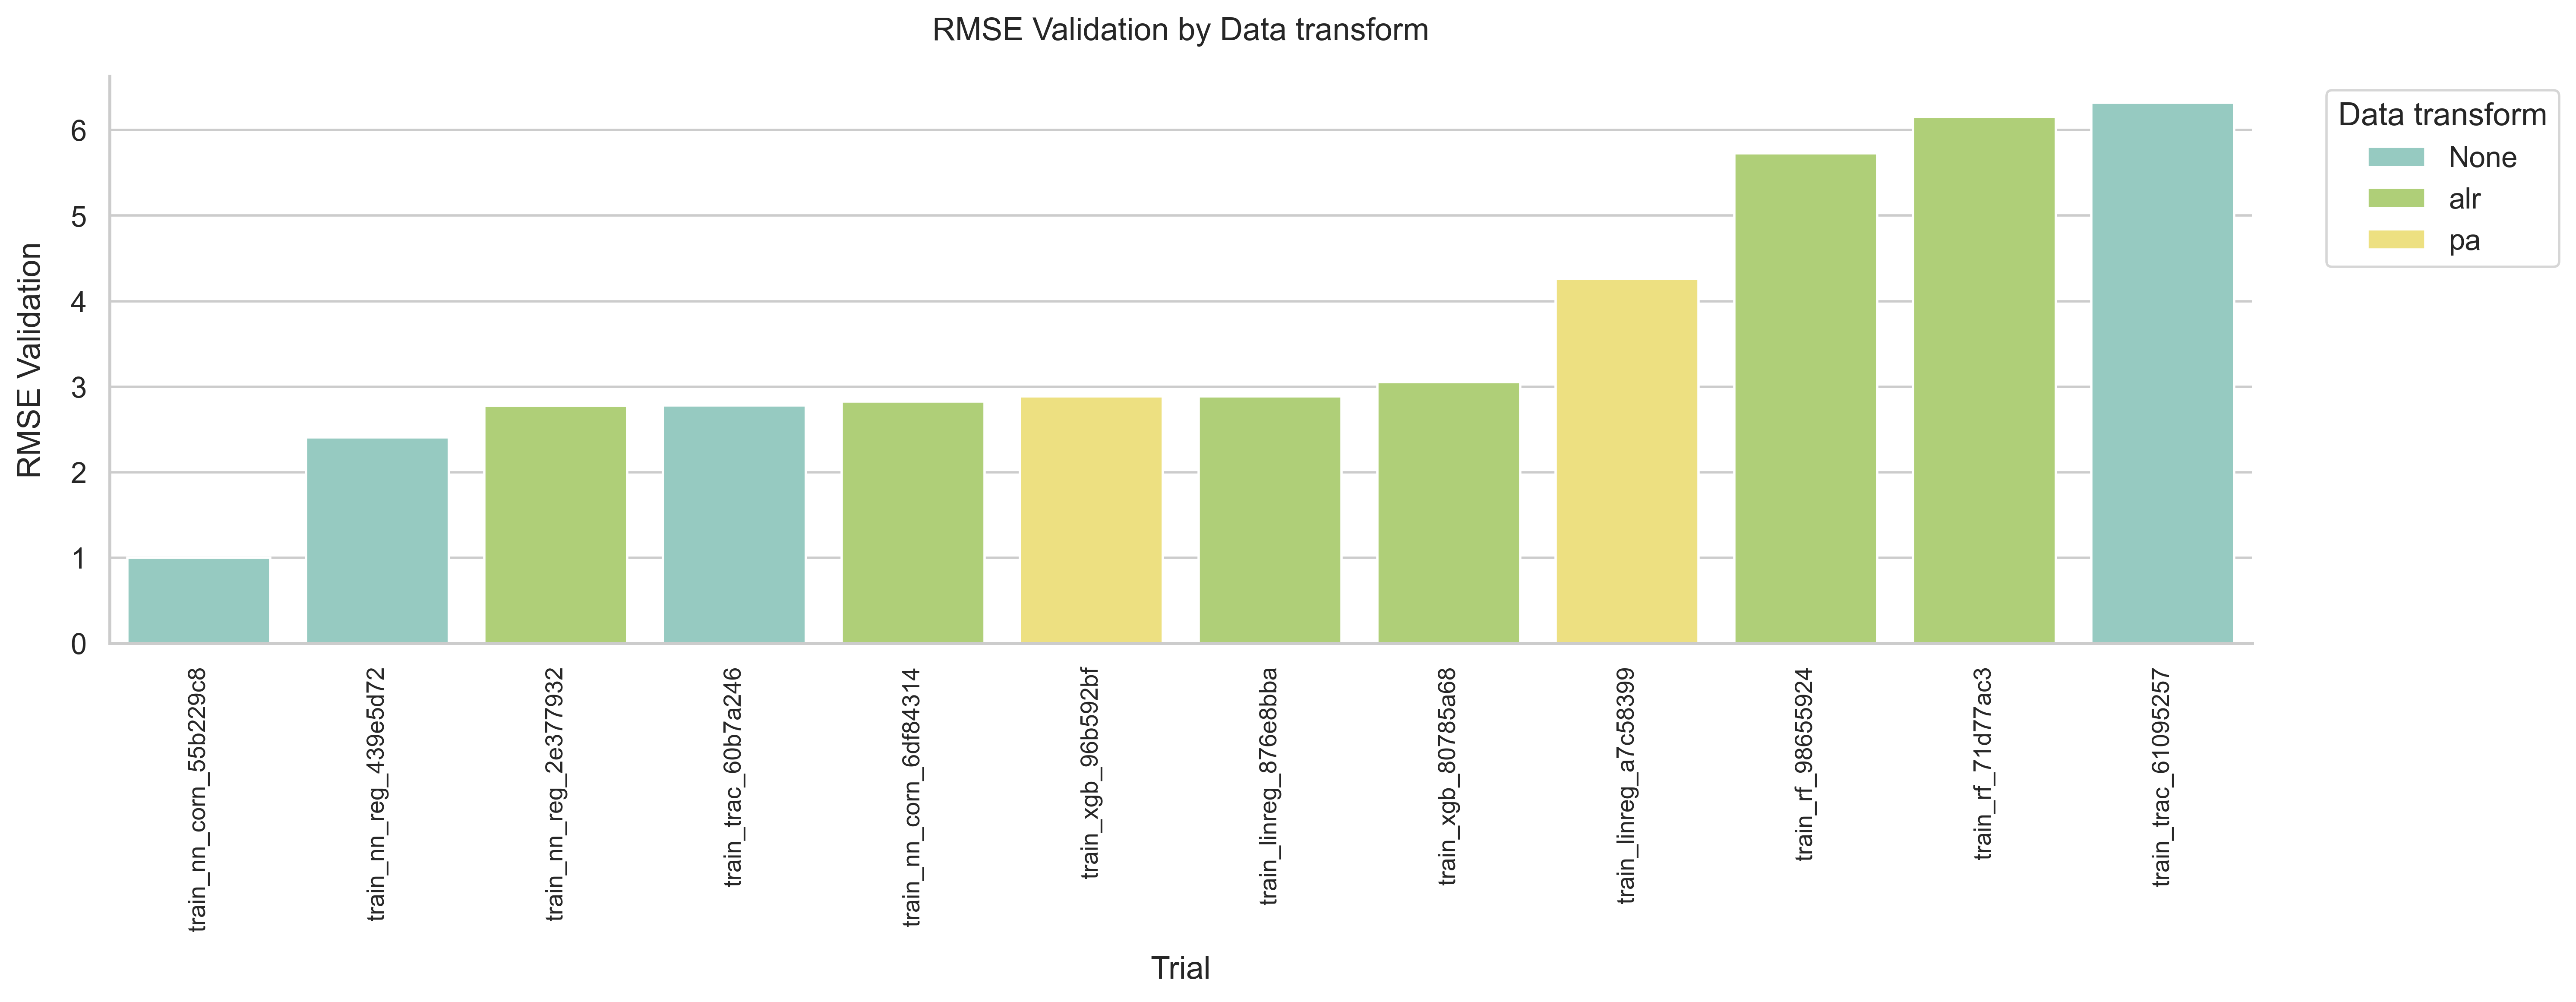

In [10]:
var = "params.data_transform"
var_name = "Data transform"

barplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
    display_trial_name=True,  # if true display trial name on the x-axis
    top_n=None,  # to plot top N models, set to an integer value
)

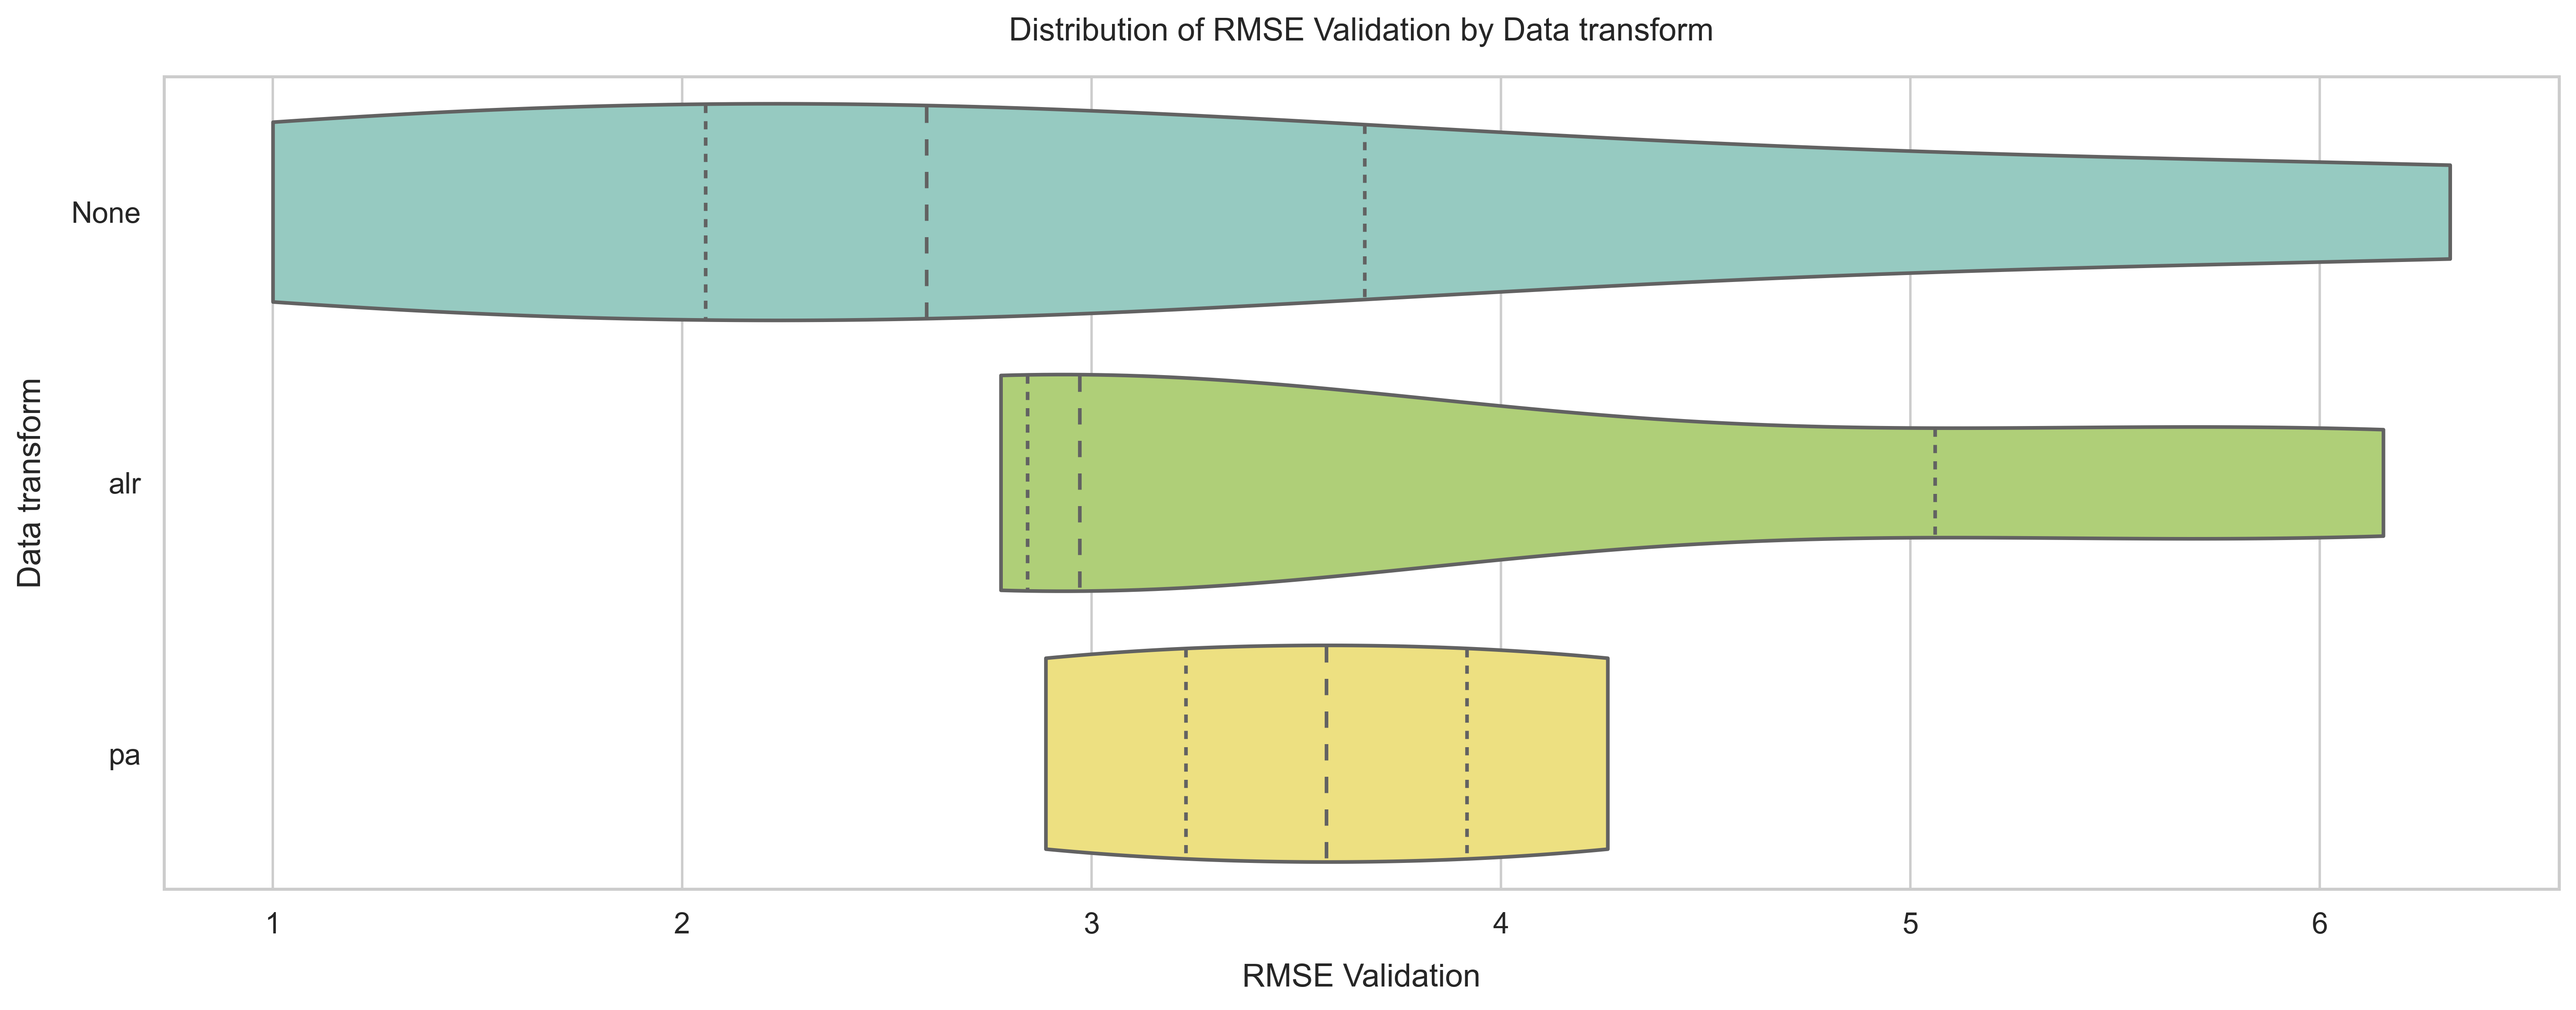

In [11]:
violinplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
)

In [12]:
parallel_coordinates_plot(all_trials, var, var_name, first_metric_cat=True)

### Effect of data selection

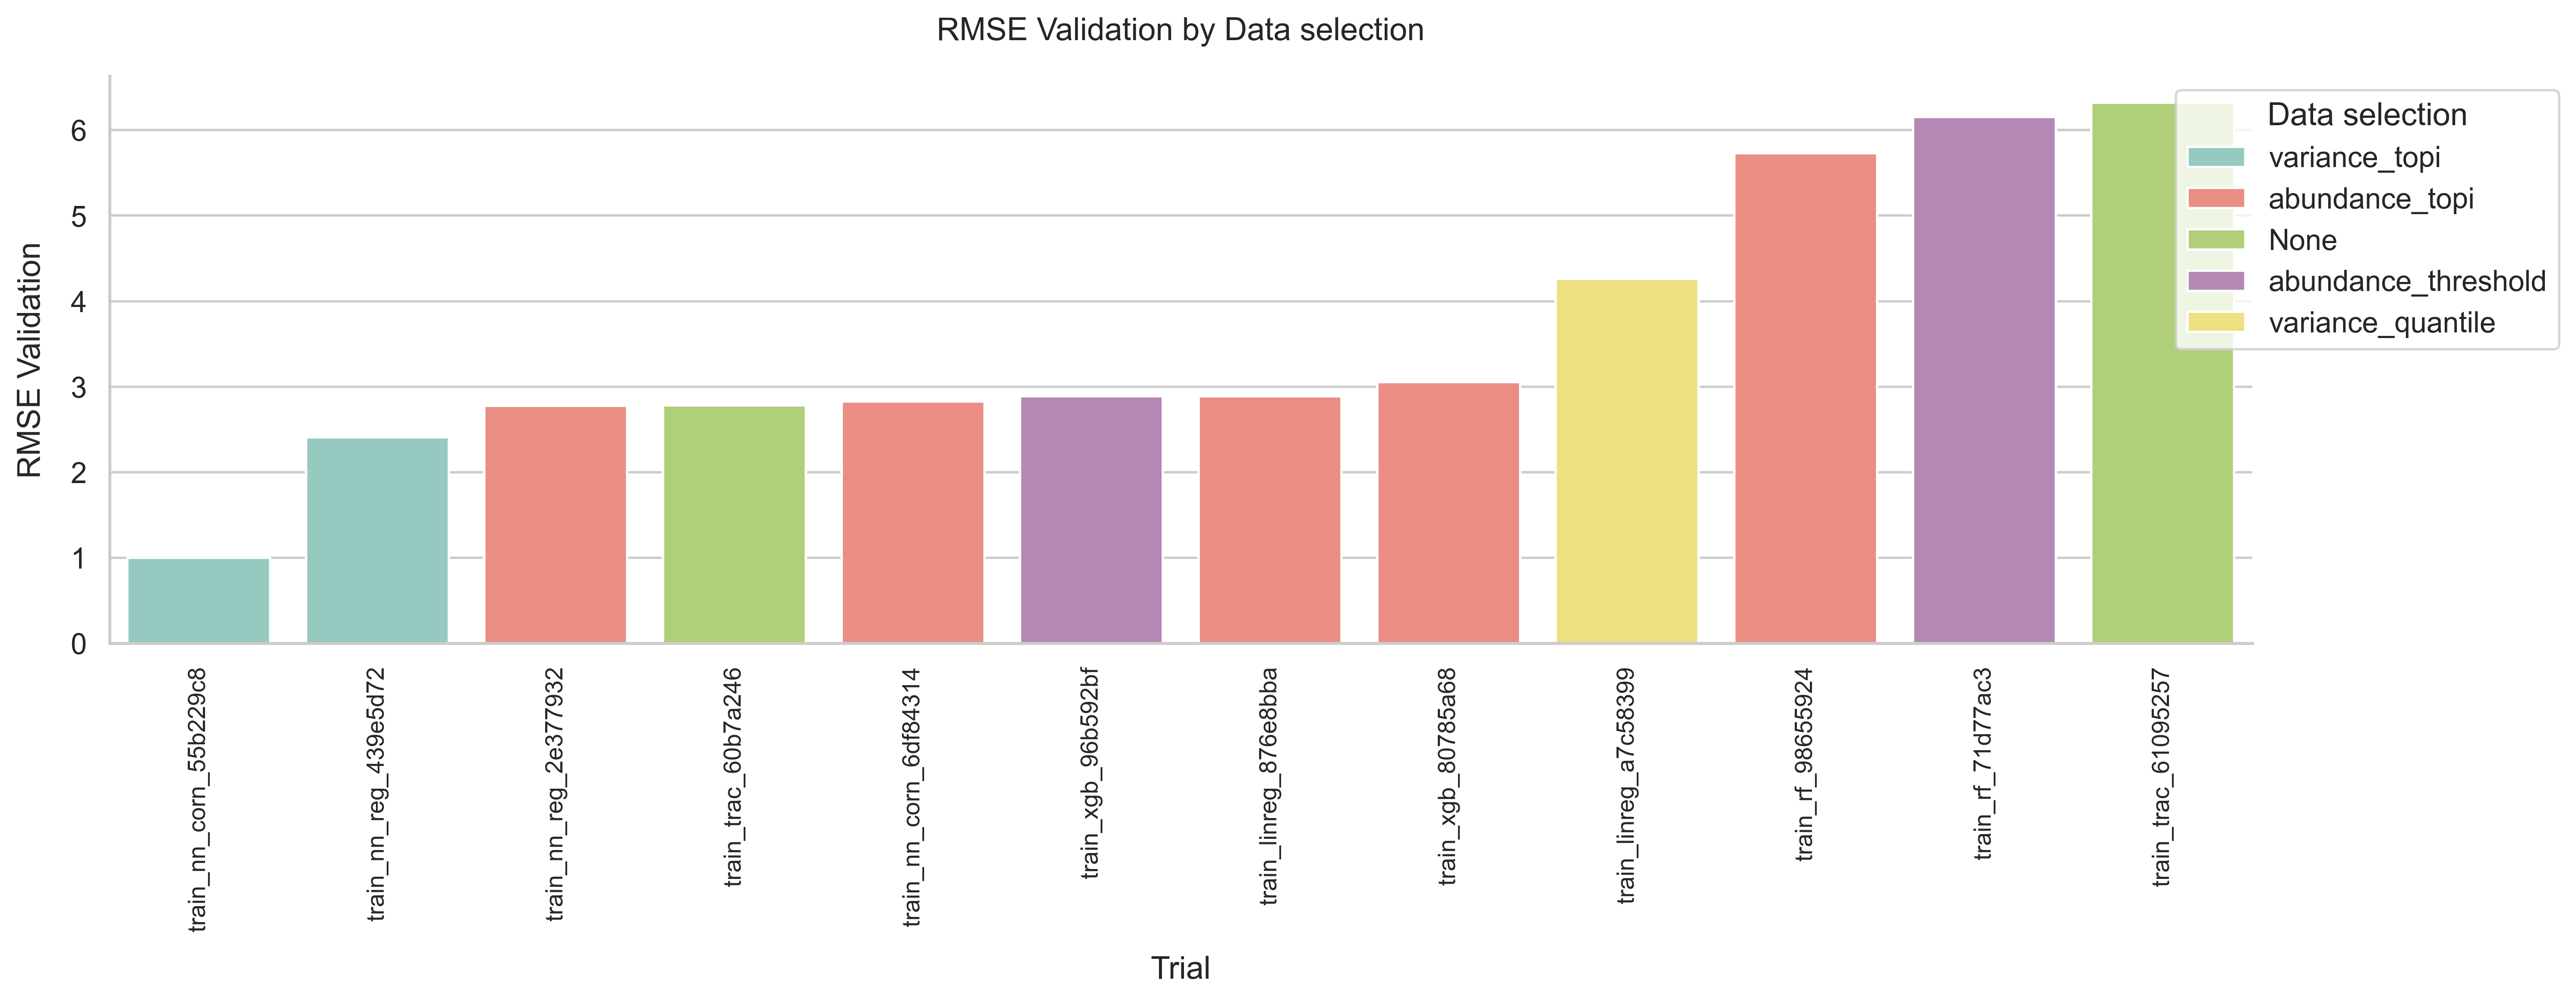

In [13]:
var = "params.data_selection"
var_name = "Data selection"

barplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
    display_trial_name=True,  # if true display trial name on the x-axis
    top_n=None,  # to plot top N models, set to an integer value
)

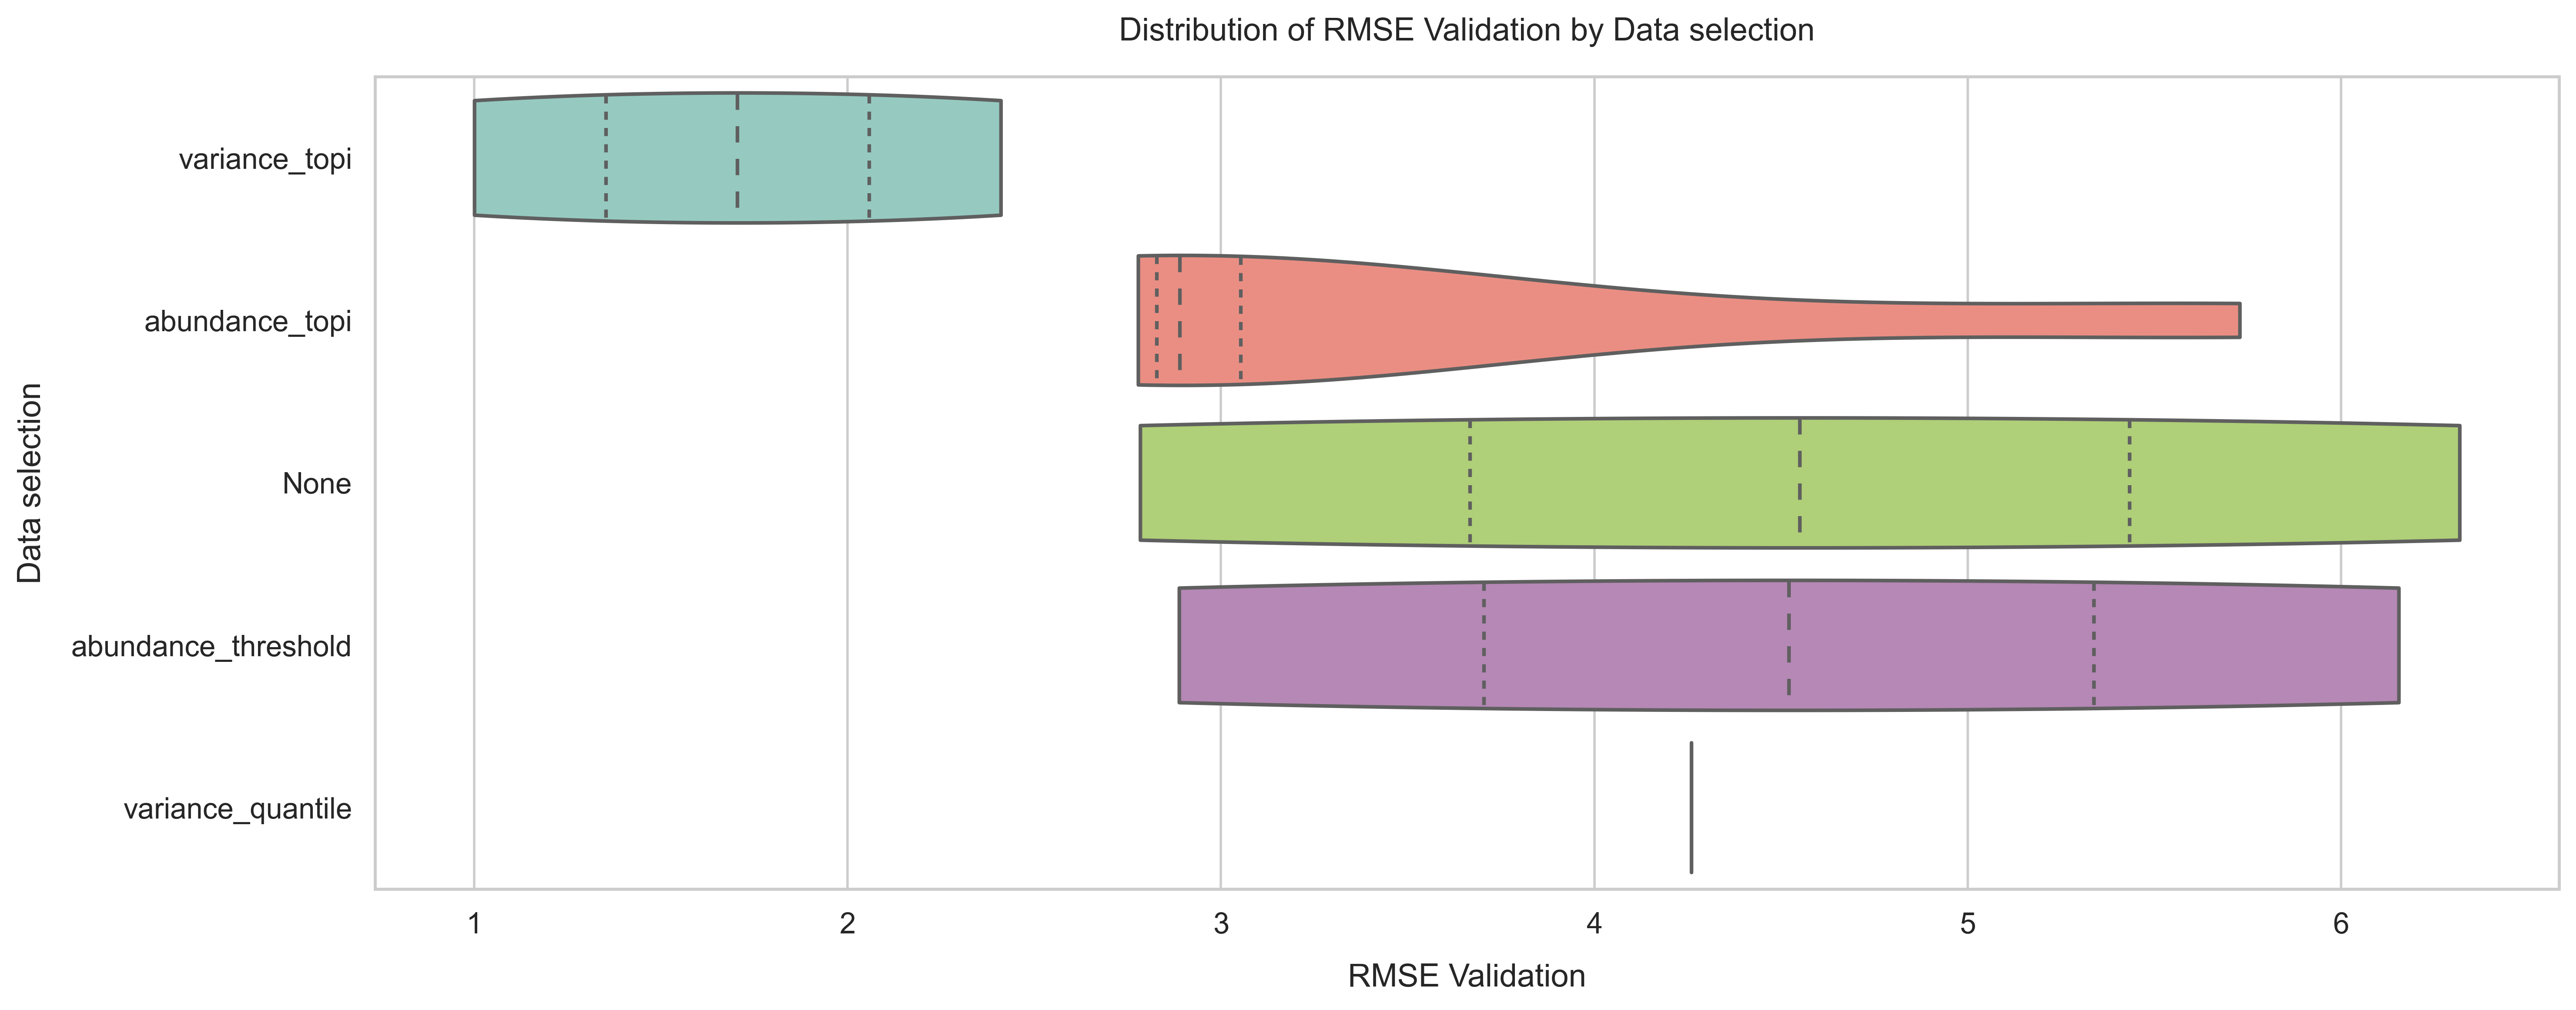

In [14]:
violinplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
)

In [15]:
parallel_coordinates_plot(all_trials, var, var_name, first_metric_cat=True)

### Effect of data aggregation

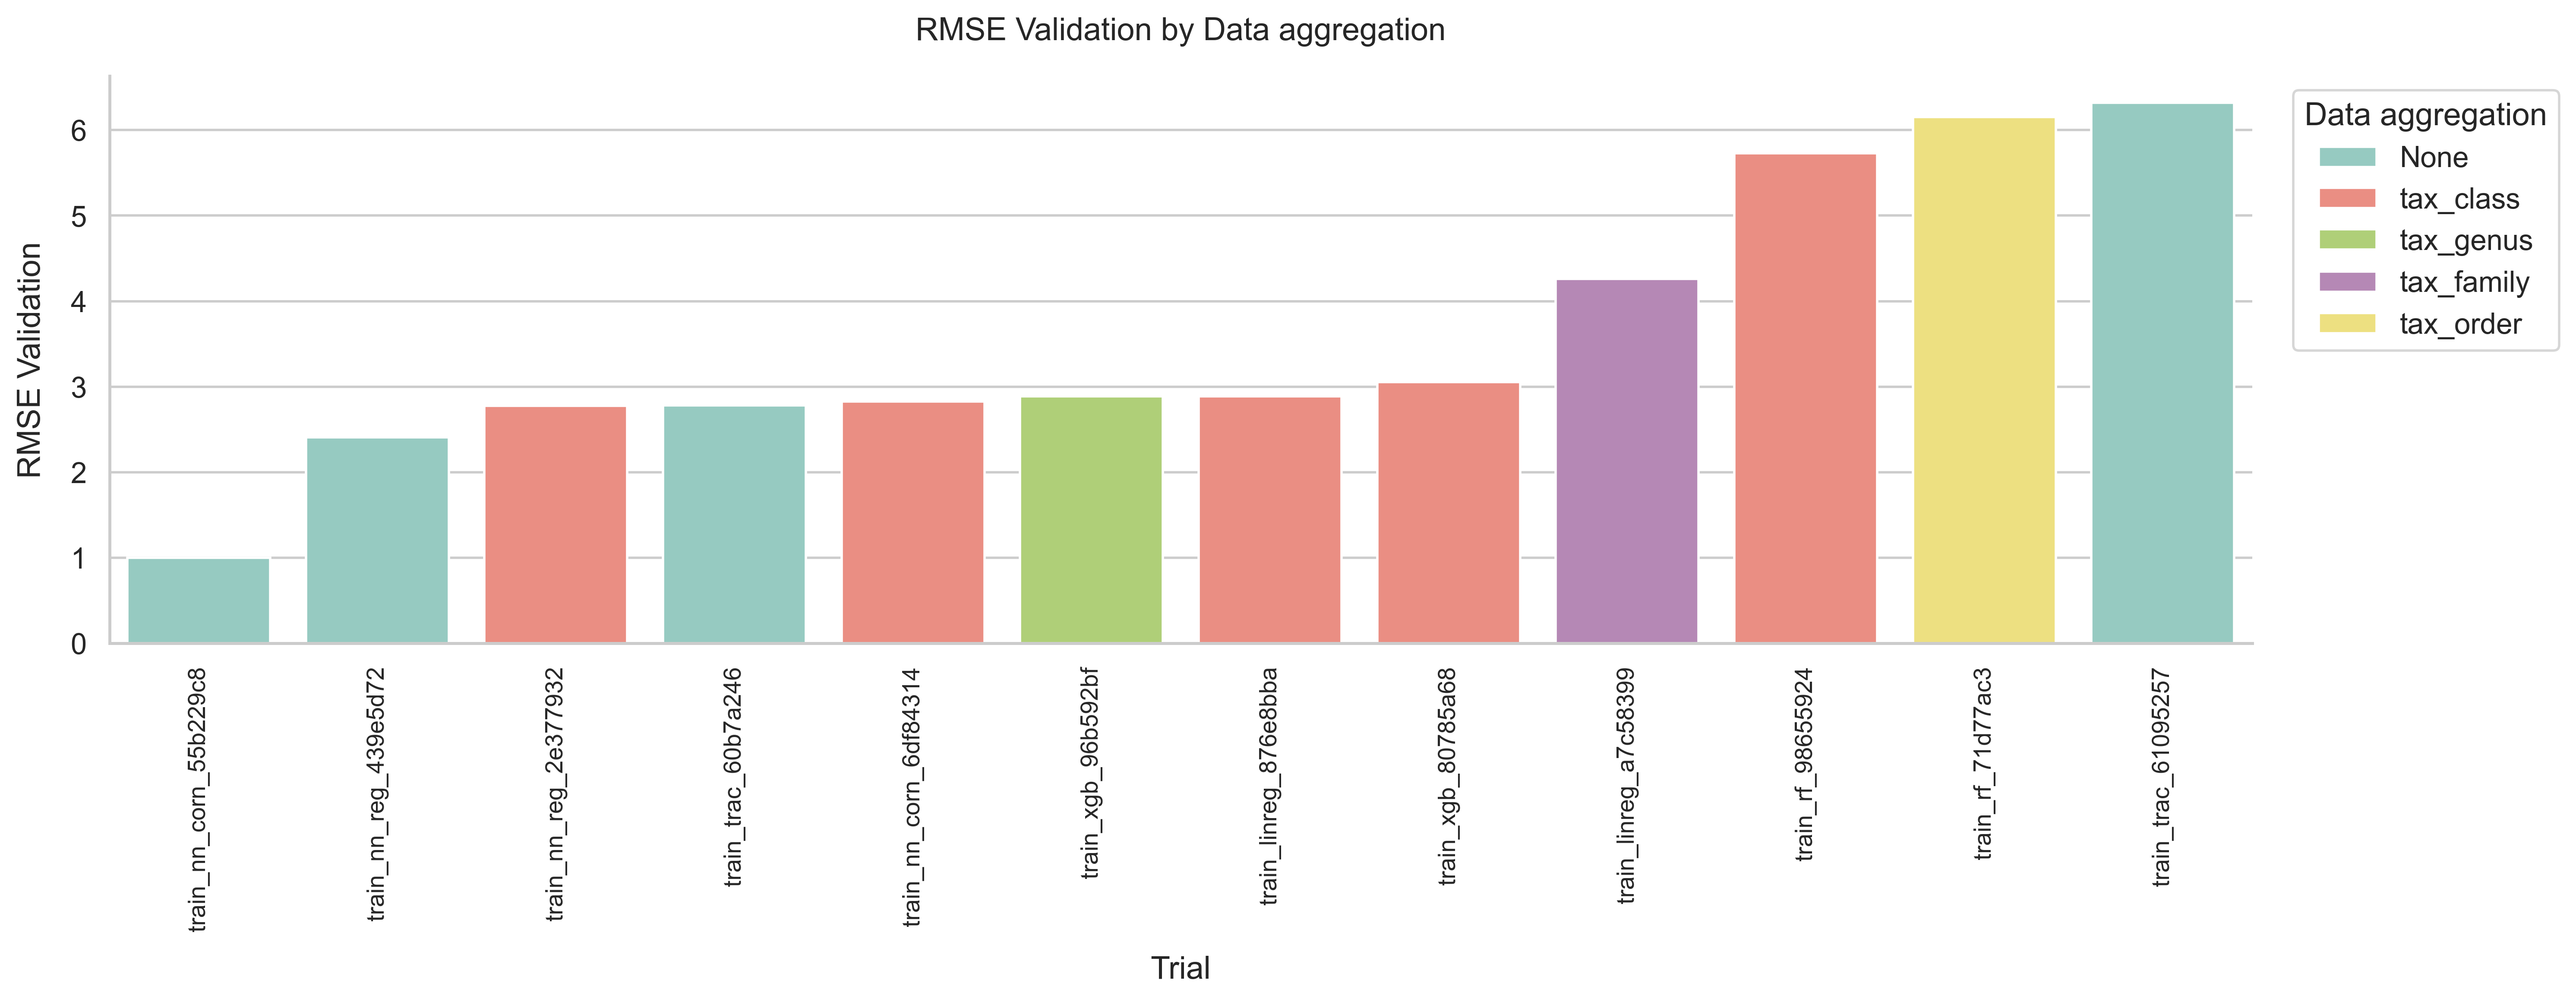

In [16]:
var = "params.data_aggregation"
var_name = "Data aggregation"

barplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
    display_trial_name=True,  # if true display trial name on the x-axis
    top_n=None,  # to plot top N models, set to an integer value
)

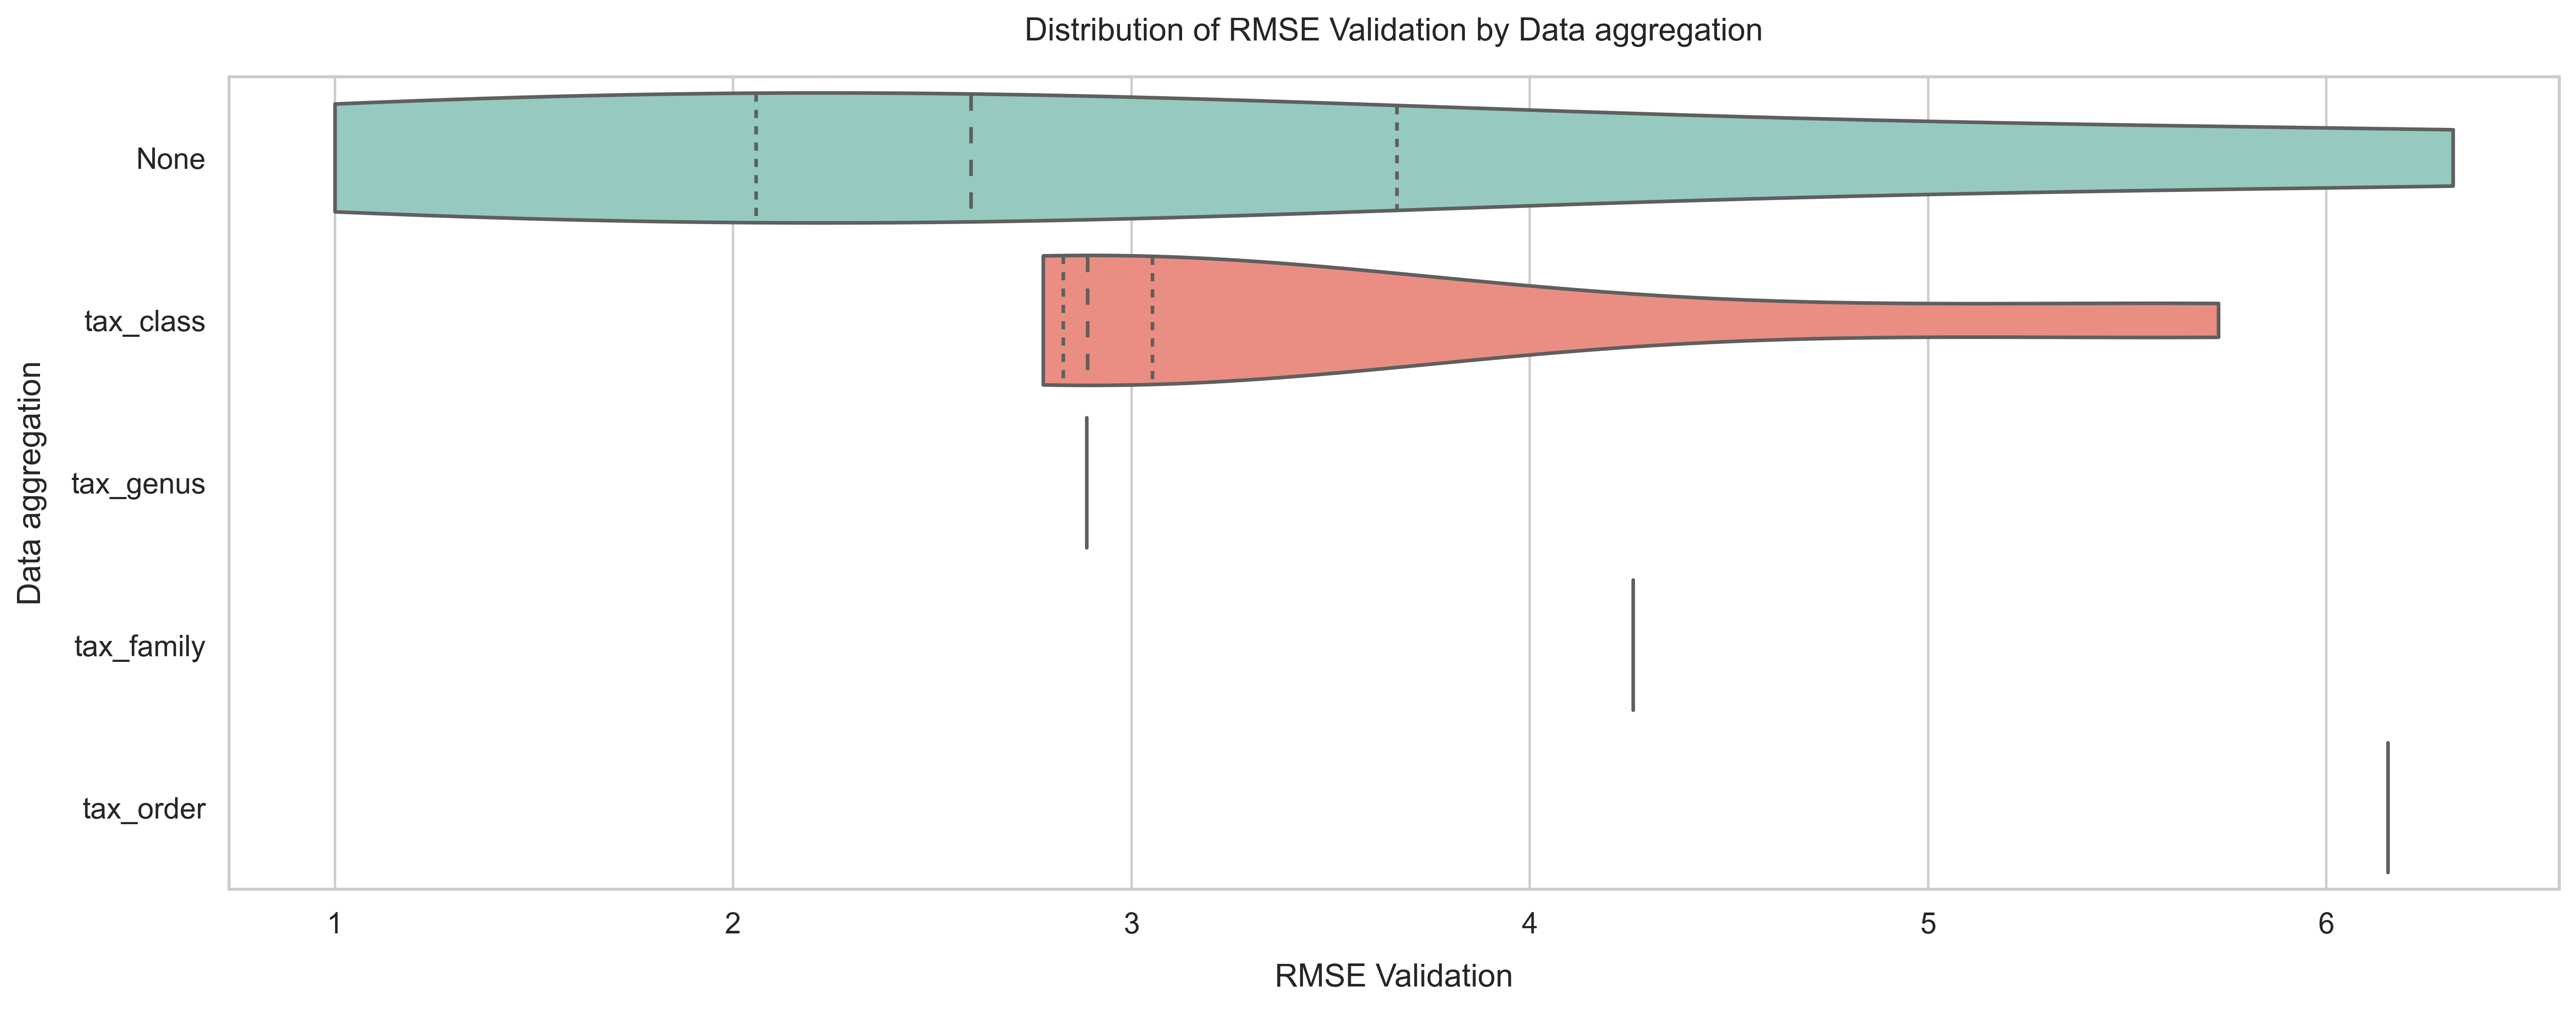

In [17]:
violinplot_metric(
    all_trials,
    metric_col="metrics.rmse_val",
    metric_name="RMSE Validation",
    group_col=var,
    group_name=var_name,
)

In [18]:
parallel_coordinates_plot(all_trials, var, var_name, first_metric_cat=True)

## Training over time

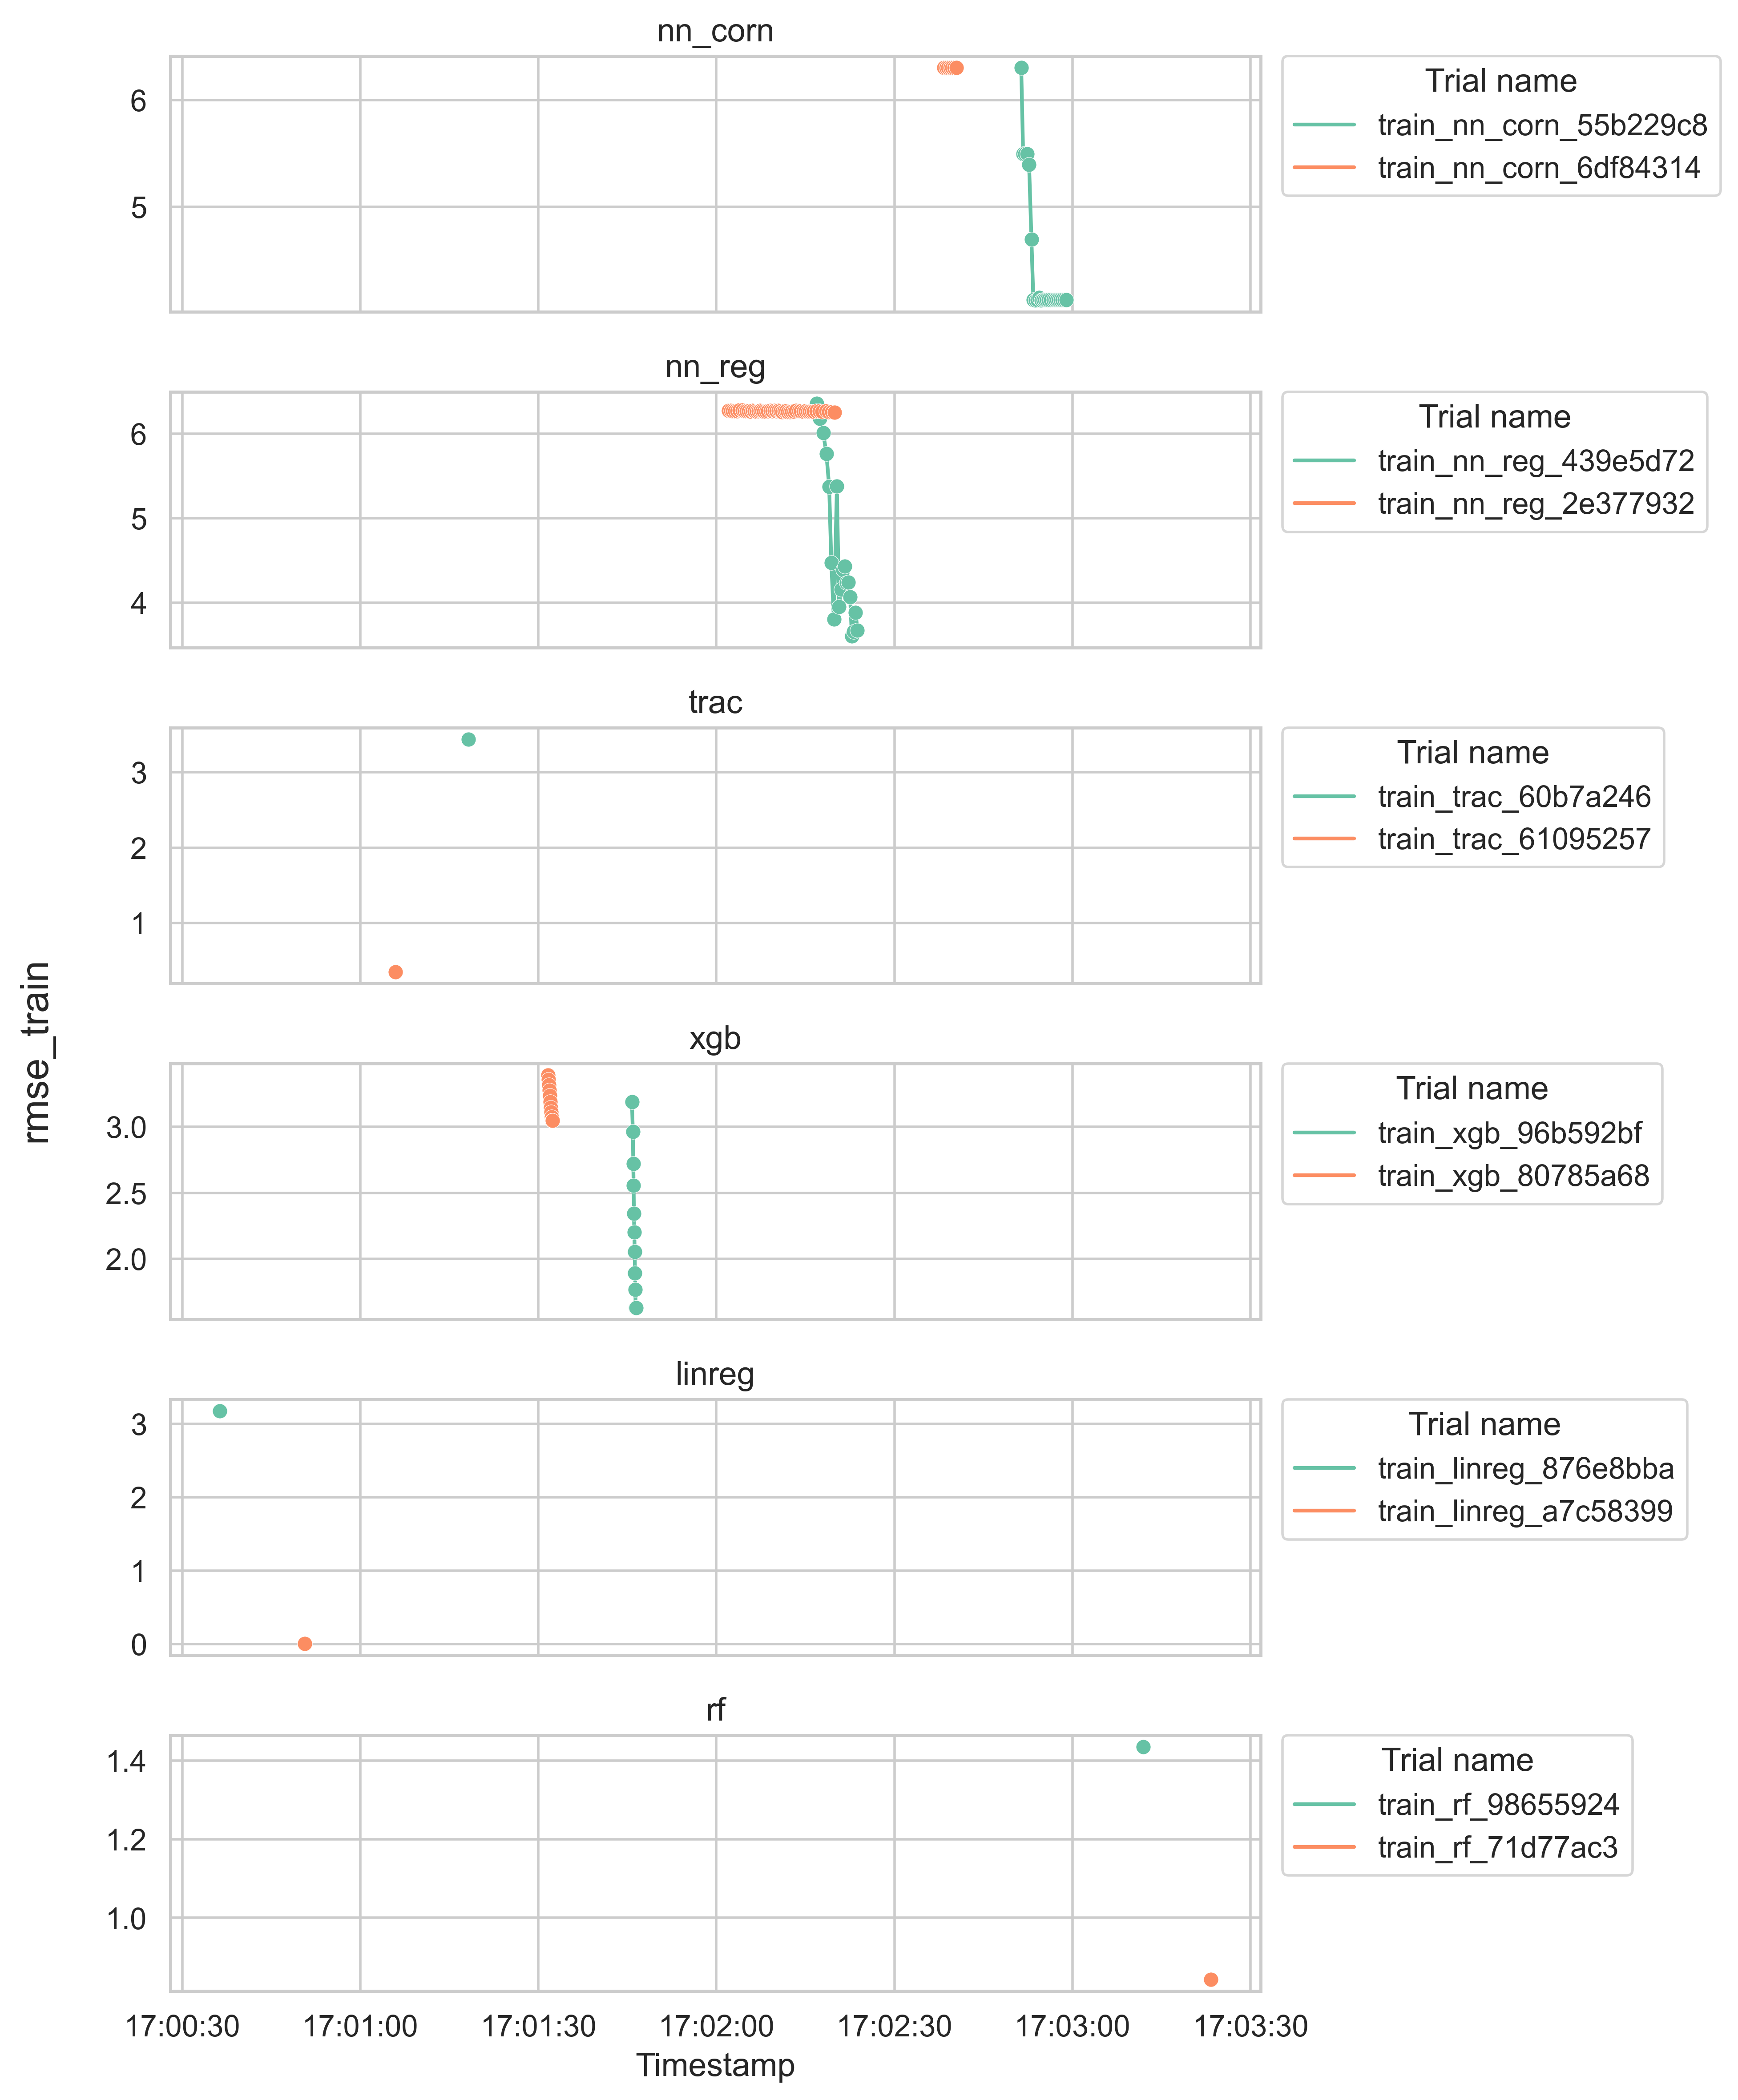

In [25]:
metric = "rmse_train"
client = mlflow.tracking.MlflowClient(tracking_uri=log_folder_location)

plot_metric_history_per_model_type(metric, client, all_trials)

* If per model type later launched trials yield smaller RMSE train then the selected search algorithm works

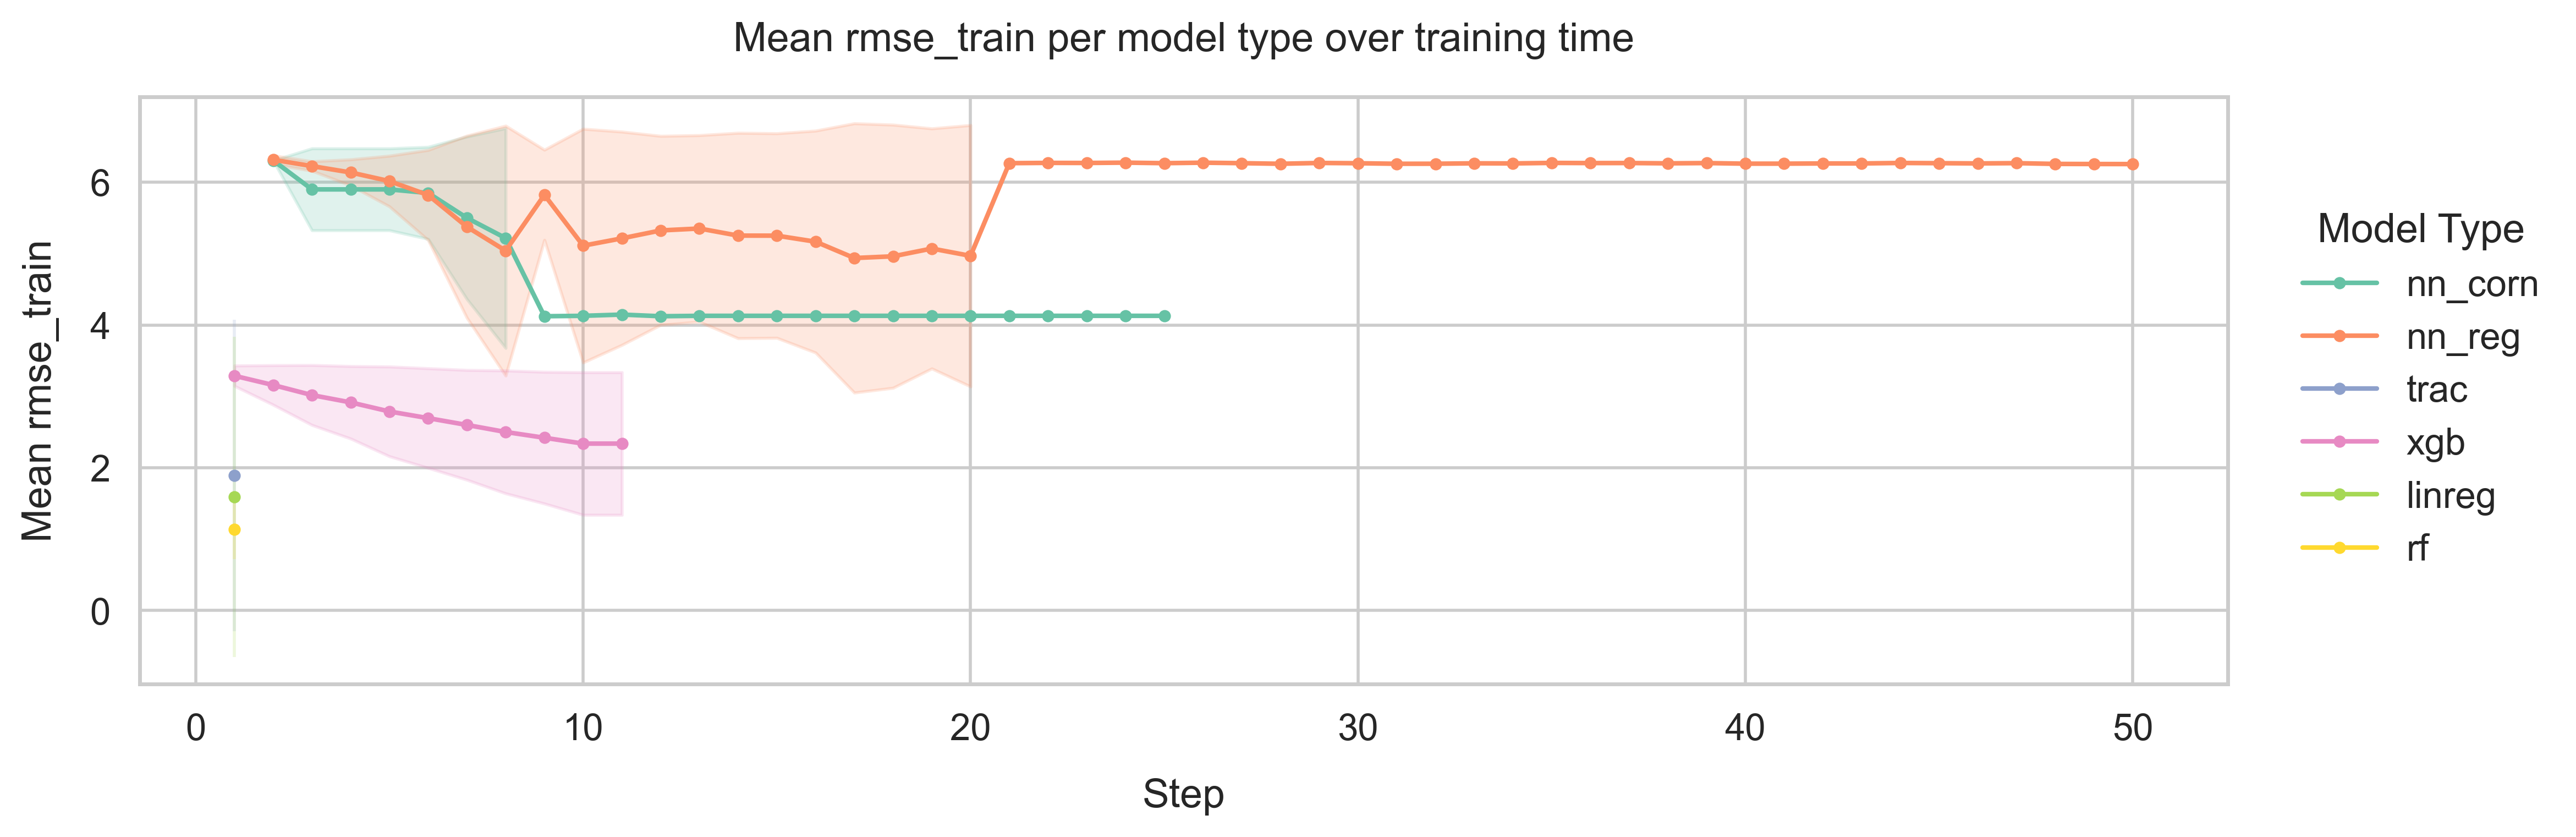

In [20]:
plot_avg_history_per_model_type("rmse_train", client, all_trials)

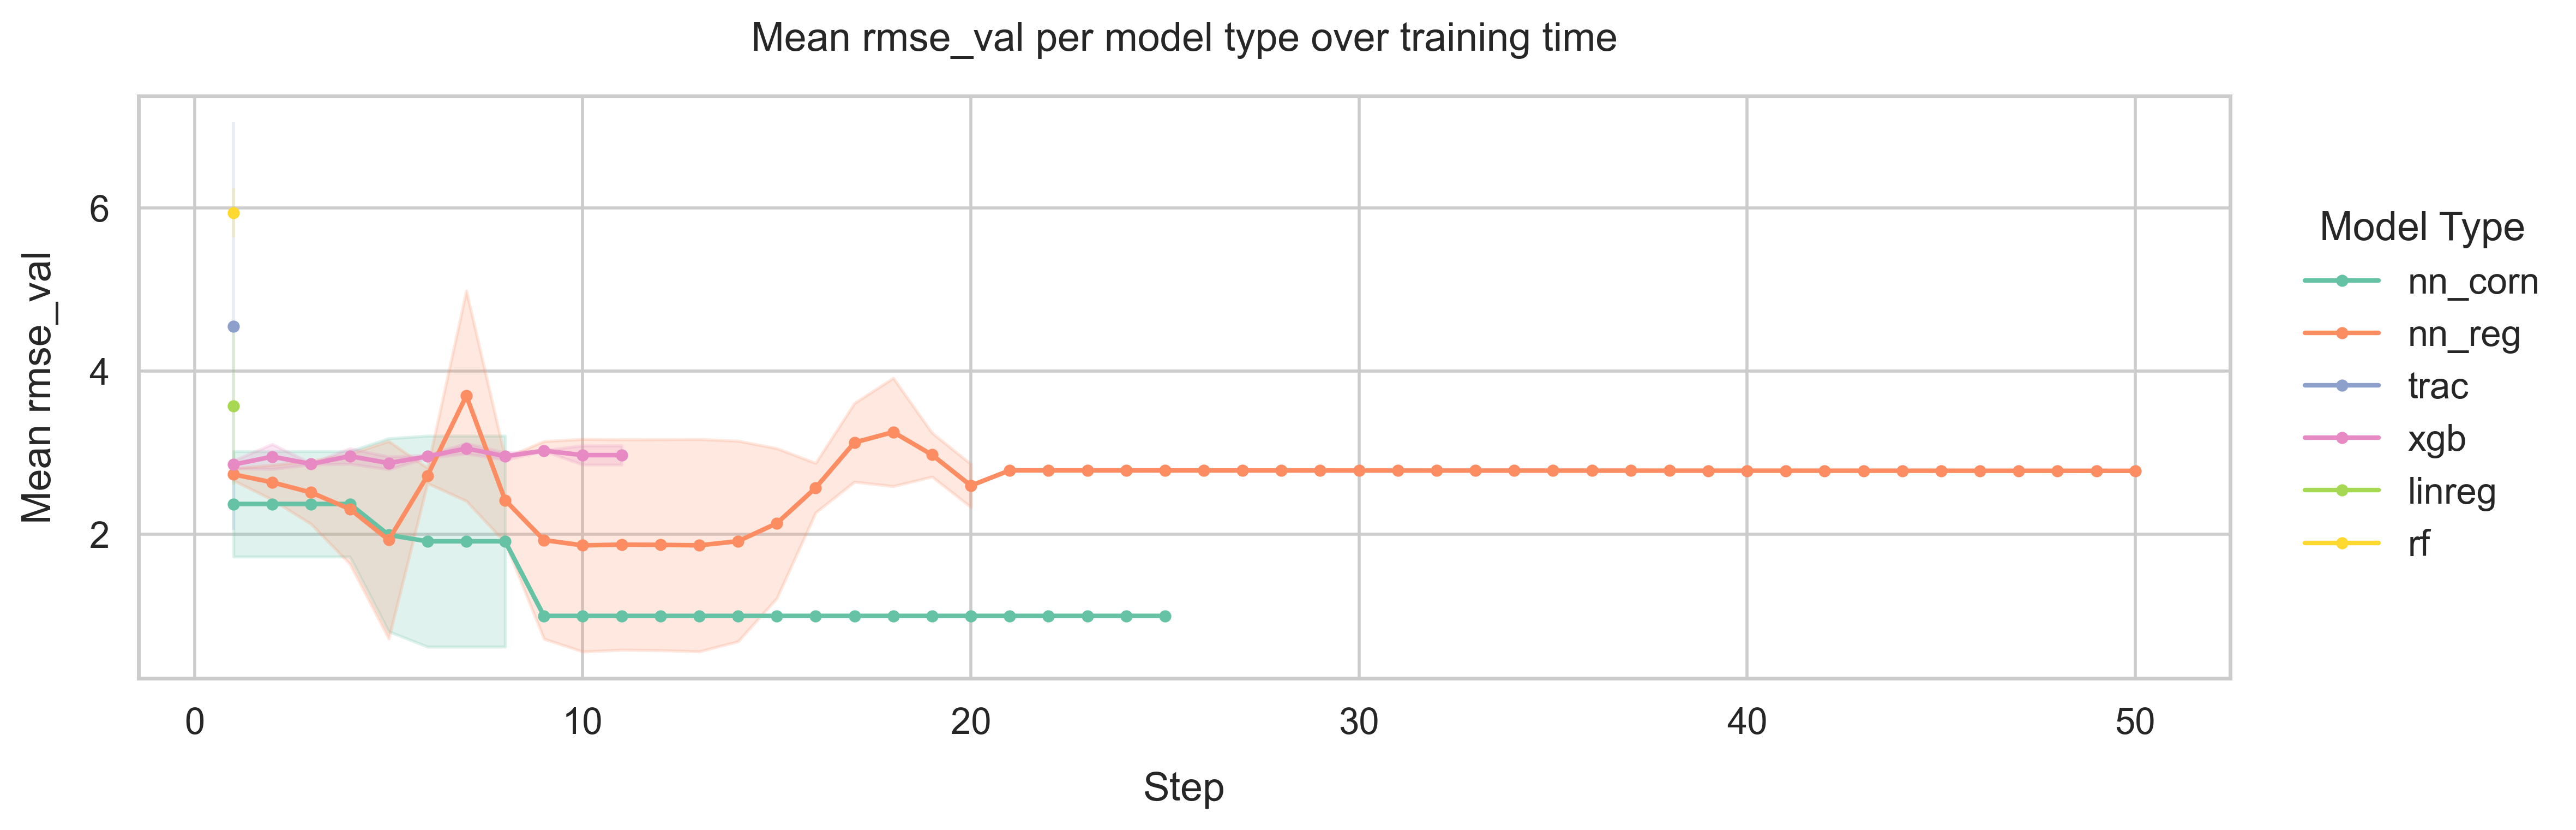

In [21]:
plot_avg_history_per_model_type("rmse_val", client, all_trials)

## Run configuration overview

In [22]:
run_config = extract_run_config(all_trials)
run_config

run_id       experiment_id  \
0   9cdc4ca2c9a646dc89dcd9353a72d864  923381902306180198   
1   b3719629c6b34313a07dc1c5292e337f  812351114393248673   
2   e4447b6c07634870988e0622838b270d  812351114393248673   
3   a53dd8743bd746abbbf5e03a5a97335d  475916289348263560   
4   f1f74fd9078b4c5999c13fa81d182044  923381902306180198   
5   e82a4c43b8904b22953863ec0cf2dfef  901943693983584044   
6   3df60015f2ab4237a6d86100872537a9  676282019922168742   
7   d0b7c7a9943c430680d493c3b0e4a394  901943693983584044   
8   40959527ebb845248dfa582826588274  676282019922168742   
9   9fe655ea2e0e4965b5fb34a7524738e9  883355031658876967   
10  8604db812c704d26990c6e404fe9868b  883355031658876967   
11  0e169c3ef7cd41638ebc25db25fa7519  475916289348263560   

                         start_time                         end_time  \
0  2025-06-08 17:02:49.303000+00:00 2025-06-08 17:02:59.077000+00:00   
1  2025-06-08 17:02:14.394000+00:00 2025-06-08 17:02:23.987000+00:00   
2  2025-06-08 17:01:59.778000+00:00 2025-06-08 17:02:20.135000+00:00   
3  2025-06-08 17:01:16.701000+00:00 2025-06-08 17:01:18.235000+00:00   
4  2025-06-08 17:02:36.058000+00:00 2025-06-08 17:02:40.589000+00:00   
5  2025-06-08 17:01:45.583000+00:00 2025-06-08 17:01:46.548000+00:00   
6  2025-06-08 17:00:36.166000+00:00 2025-06-08 17:00:36.428000+00:00   
7  2025-06-08 17:01:31.486000+00:00 2025-06-08 17:01:32.502000+00:00   
8  2025-06-08 17:00:50.533000+00:00 2025-06-08 17:00:50.692000+00:00   
9  2025-06-08 17:03:11.530000+00:00 2025-06-08 17:03:11.949000+00:00   
10 2025-06-08 17:03:23.161000+00:00 2025-06-08 17:03:23.397000+00:00   
11 2025-06-08 17:01:03.961000+00:00 2025-06-08 17:01:05.970000+00:00   

    metrics.timestamp  metrics.rmse_val  metrics.r2_val  \
0        1.749402e+09          1.000000       -0.125000   
1        1.749402e+09          2.410201       -5.535202   
2        1.749402e+09          2.778073       -7.682402   
3        1.749402e+09          2.783577       -7.716837   
4        1.749402e+09          2.828427       -8.000002   
5        1.749402e+09          2.887764       -8.381576   
6        1.749402e+09          2.890174       -8.397244   
7        1.749402e+09          3.053084       -9.486488   
8        1.749402e+09          4.260201      -19.417973   
9        1.749402e+09          5.728734      -35.920697   
10       1.749402e+09          6.154619      -41.614254   
11       1.749402e+09          6.317695      -43.902431   

    metrics.config/n_units_hl22  metrics.config/n_units_hl6  \
0                          32.0                       256.0   
1                          32.0                       256.0   
2                         256.0                       128.0   
3                           NaN                         NaN   
4                         256.0                       128.0   
5                           NaN                         NaN   
6                           NaN                         NaN   
7                           NaN                         NaN   
8                           NaN                         NaN   
9                           NaN                         NaN   
10                          NaN                         NaN   
11                          NaN                         NaN   

    metrics.config/n_units_hl10  ...            params.alpha  \
0                          32.0  ...                    None   
1                          32.0  ...                    None   
2                         512.0  ...                    None   
3                           NaN  ...                    None   
4                         512.0  ...                    None   
5                           NaN  ...                    None   
6                           NaN  ...       2.248656674873989   
7                           NaN  ...                    None   
8                           NaN  ...  0.00017496421458802273   
9                           NaN  ...                    None   
10                  